In [1]:
!pip install ultralytics opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 106.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 83.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 82.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [2]:
!git clone https://github.com/sbandong/YOLOws.git

Cloning into 'YOLOws'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 9 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (9/9), 4.08 MiB | 6.20 MiB/s, done.


In [3]:
from ultralytics import YOLO
import cv2
import numpy as np

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [22]:
# upload terlebih dahulu semua gambar yang akan diolah ke notebook
image_path = "/content/YOLOws/meja.jpg"
image = cv2.imread(image_path)


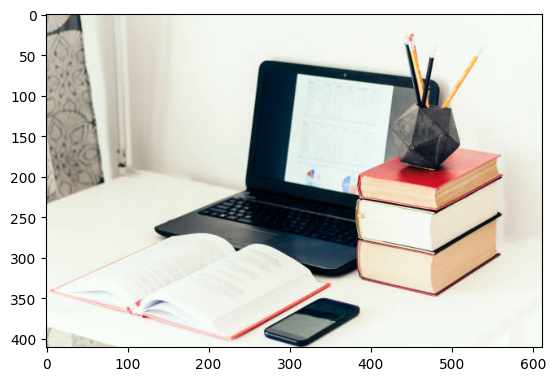

In [23]:
import matplotlib.pyplot as plt
image_rgb=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)

In [24]:
# Load a pretrained YOLOv8 model
#https://docs.ultralytics.com/
model = YOLO("yolo11n.pt") #yolo11n.pt
# Perform inference
results = model(image)
confident_results = [det for det in results[0].boxes if det.conf[0] > 0.5]
# Display the results
for box in confident_results:
    x1, y1, x2, y2 = box.xyxy[0]  # Bounding box coordinates
    confidence = box.conf[0]  # Confidence score
    class_id = box.cls[0]  # Class ID
    label = model.names[int(class_id)]  # Get class label

    # Draw the bounding box and label
    cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
    cv2.putText(image, f"{label} {confidence:.2f}", (int(x1), int(y1) - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)



0: 448x640 1 tv, 1 laptop, 1 cell phone, 5 books, 146.3ms
Speed: 6.8ms preprocess, 146.3ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)


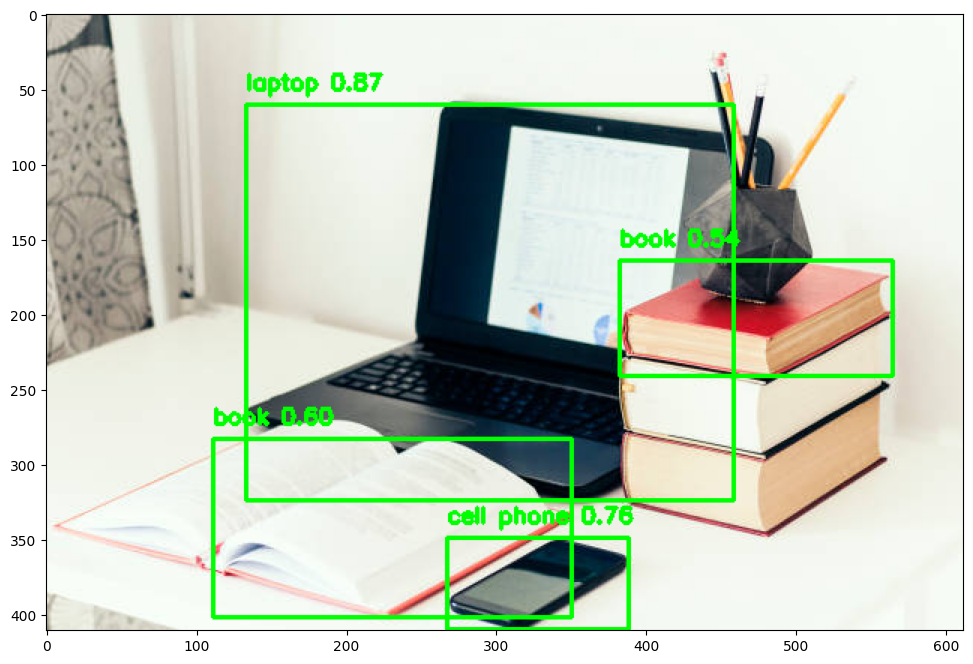

In [25]:
# Show the image with bounding boxes
image_yolo = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12, 8))
plt.imshow( image_yolo)


In [ ]:
# Path to input video and output video
input_video_path = "/content/YOLOws/Pedestrian.mp4"
output_video_path = "/content/YOLOws/Pedestrian_yolo.mp4"

# Open the input video
video_capture = cv2.VideoCapture(input_video_path)

# Get video properties
frame_width = int(video_capture.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(video_capture.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(video_capture.get(cv2.CAP_PROP_FPS))

# Define the codec and create a VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # 'mp4v' for MP4 format
video_writer = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))

# Process the video frame by frame
while video_capture.isOpened():
    ret, frame = video_capture.read()
    if not ret:
        break  # End of video

    # Perform inference on the current frame
    results = model(frame)
    confident_results = [det for det in results[0].boxes if det.conf[0] > 0.5]
    # Draw bounding boxes and labels on the frame
    for box in confident_results:
        x1, y1, x2, y2 = box.xyxy[0]  # Bounding box coordinates
        confidence = box.conf[0]  # Confidence score
        class_id = box.cls[0]  # Class ID
        label = model.names[int(class_id)]  # Get class label

        # Draw bounding box
        cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)

        # Add label with confidence
        cv2.putText(
            frame,
            f"{label} {confidence:.2f}",
            (int(x1), int(y1) - 10),
            cv2.FONT_HERSHEY_SIMPLEX,
            0.5,
            (0, 255, 0),
            2,
        )

    # Write the processed frame to the output video
    video_writer.write(frame)

# Release resources
video_capture.release()
video_writer.release()

print(f"Processed video saved as {output_video_path}")


0: 384x640 (no detections), 261.7ms
Speed: 3.3ms preprocess, 261.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 214.4ms
Speed: 4.1ms preprocess, 214.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 190.2ms
Speed: 3.2ms preprocess, 190.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 211.3ms
Speed: 3.4ms preprocess, 211.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 204.4ms
Speed: 3.2ms preprocess, 204.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 179.8ms
Speed: 3.3ms preprocess, 179.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 192.0ms
Speed: 3.3ms preprocess, 192.0ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 210.1ms
Speed: 3.2ms prepr

## Roboflow

1. Buka website https://roboflow.com/, dan sign in menggunakan google account anda
2. Di tab menu sebelah kiri, pilih "universe", Anda bisa memilih sejumlah sejumlah pretrained model untuk deteksi berbagai kasus


In [ ]:
!pip install roboflow
!pip install supervision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 59.3 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 3.0 MB/s eta 0:00:00


loading Roboflow workspace...
loading Roboflow project...
{'predictions': [{'x': 218.0, 'y': 129.0, 'width': 42.0, 'height': 76.0, 'confidence': 0.8832541704177856, 'class': 'person', 'class_id': 0, 'detection_id': '570ce09a-f5b9-418f-8309-7d2a554f3b64', 'image_path': '/content/YOLOws/Liverpool.jpg', 'prediction_type': 'ObjectDetectionModel'}, {'x': 340.0, 'y': 128.0, 'width': 44.0, 'height': 70.0, 'confidence': 0.8766222596168518, 'class': 'person', 'class_id': 0, 'detection_id': 'ef371103-f2be-4e97-ae48-671357fe2f0c', 'image_path': '/content/YOLOws/Liverpool.jpg', 'prediction_type': 'ObjectDetectionModel'}, {'x': 509.0, 'y': 240.0, 'width': 54.0, 'height': 134.0, 'confidence': 0.8713196516036987, 'class': 'person', 'class_id': 0, 'detection_id': '6feb85e1-1cb2-498f-92ff-9a320ea97b4d', 'image_path': '/content/YOLOws/Liverpool.jpg', 'prediction_type': 'ObjectDetectionModel'}, {'x': 296.0, 'y': 124.5, 'width': 50.0, 'height': 75.0, 'confidence': 0.867100715637207, 'class': 'person', 'cl

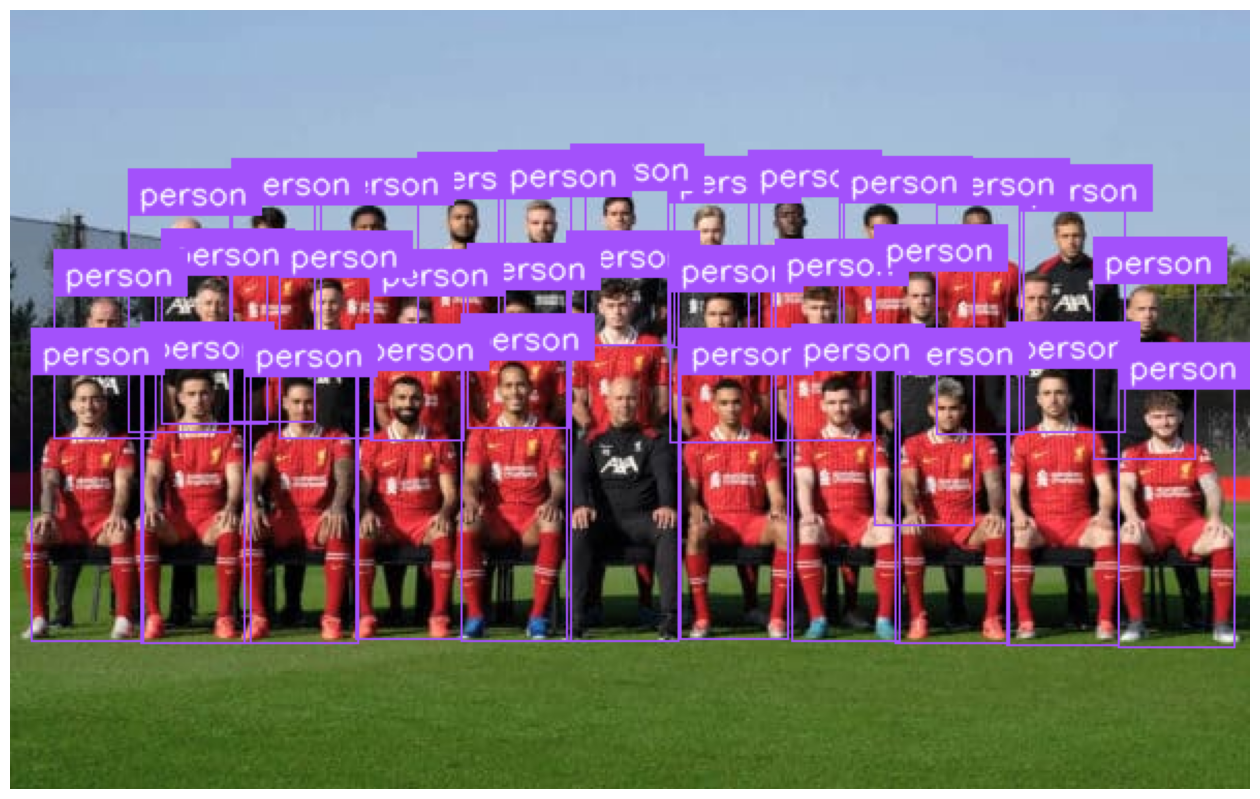

In [ ]:
from roboflow import Roboflow
import supervision as sv
import cv2

#https://universe.roboflow.com/leo-ueno/people-detection-o4rdr
rf = Roboflow(api_key="kVhCIoCZJqxbnAHBq84x")
project = rf.workspace().project("people-detection-o4rdr")
model = project.version(8).model

result = model.predict("/content/YOLOws/Liverpool.jpg", confidence=40, overlap=60).json()
print(result)

labels = [item["class"] for item in result["predictions"]]

detections = sv.Detections.from_inference(result)

label_annotator = sv.LabelAnnotator(text_scale=0.5, text_padding=5)
bounding_box_annotator = sv.BoxAnnotator(thickness=1)

image = cv2.imread("/content/YOLOws/Liverpool.jpg")

annotated_image = bounding_box_annotator.annotate(
    scene=image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections, labels=labels)

sv.plot_image(image=annotated_image, size=(16, 16))

In [ ]:
from roboflow import Roboflow
import supervision as sv
import cv2

# Initialize Roboflow
#https://universe.roboflow.com/leo-ueno/people-detection-o4rdr
rf = Roboflow(api_key="kVhCIoCZJqxbnAHBq84x")
project = rf.workspace().project("people-detection-o4rdr")
model = project.version(8).model

# Path to input video and output video
input_video_path = "/content/YOLOws/Pedestrian.mp4"
output_video_path = "/content/YOLOws/Pedestrian_robo.mp4"

# Open the input video
video_capture = cv2.VideoCapture(input_video_path)

# Get video properties
frame_width = int(video_capture.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(video_capture.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(video_capture.get(cv2.CAP_PROP_FPS))

# Define the codec and create a VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # 'mp4v' for MP4 format
video_writer = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))

# Annotators
label_annotator = sv.LabelAnnotator(text_scale=0.5, text_padding=5)
bounding_box_annotator = sv.BoxAnnotator(thickness=1)

# Process the video frame by frame
while video_capture.isOpened():
    ret, frame = video_capture.read()
    if not ret:
        break  # End of video

    # Predict on the current frame using the Roboflow model
    results = model.predict(frame, confidence=40, overlap=70).json()

    # Extract detections and labels
    detections = sv.Detections.from_inference(results)
    labels = [item["class"] for item in results["predictions"]]

    # Annotate the frame
    annotated_frame = bounding_box_annotator.annotate(
        scene=frame, detections=detections)
    annotated_frame = label_annotator.annotate(
        scene=annotated_frame, detections=detections, labels=labels)

    # Write the annotated frame to the output video
    video_writer.write(annotated_frame)

# Release resources
video_capture.release()
video_writer.release()

print(f"Processed video saved as {output_video_path}")


loading Roboflow workspace...
loading Roboflow project...
Processed video saved as /content/YOLOws/Pedestrian_robo.mp4


loading Roboflow workspace...
loading Roboflow project...


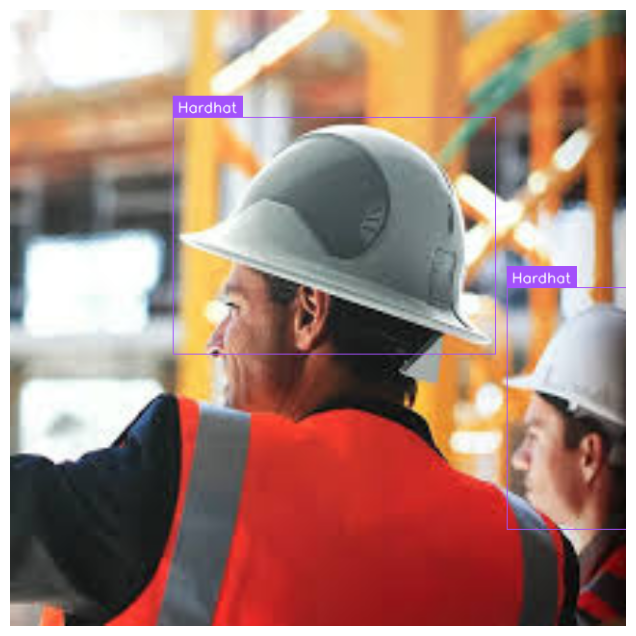

In [ ]:
# Coba model lain: Deteksi helm pelindung
#https://universe.roboflow.com/roboflow-universe-projects/hard-hats-fhbh5/model/4
from roboflow import Roboflow
import supervision as sv
import cv2
import numpy as np

rf = Roboflow(api_key="kVhCIoCZJqxbnAHBq84x")
project = rf.workspace().project("hard-hats-fhbh5")
model = project.version(4).model

image = cv2.imread("/content/YOLOws/hardhat.jpg")
image = cv2.resize(image, (640, 640))

result = model.predict(image, confidence=40, overlap=30).json()
#print(result)

labels = [item["class"] for item in result["predictions"]]

detections = sv.Detections.from_inference(result)

label_annotator = sv.LabelAnnotator(text_scale=0.5, text_padding=5)
bounding_box_annotator = sv.BoxAnnotator(thickness=1)


annotated_image = bounding_box_annotator.annotate(
    scene=image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections, labels=labels)

sv.plot_image(image=annotated_image, size=(8, 8))